# The Data
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

| **Variable**|**Definition**|
|:-: |:-: |
|AcceptedCmp1| 1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2| 1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3| 1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4| 1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise|
|Response (target)| 1 if customer accepted the offer in the last campaign, 0 otherwise|
|Complain| 1 if customer complained in the last 2 years|
|DtCustomer| date of customer’s enrolment with the company|
|Education| customer’s level of education|
|Marital| customer’s marital status|
|Kidhome| number of small children in customer’s household|
|Teenhome| number of teenagers in customer’s household|
|Income| customer’s yearly household income|
|MntFishProducts| amount spent on fish products in the last 2 years|
|MntMeatProducts| amount spent on meat products in the last 2 years|
|MntFruits| amount spent on fruits products in the last 2 years|
|MntSweetProducts| amount spent on sweet products in the last 2 years|
|MntWines| amount spent on wine products in the last 2 years|
|MntGoldProds| amount spent on gold products in the last 2 years|
|NumDealsPurchases| number of purchases made with discount|
|NumCatalogPurchases| number of purchases made using catalogue|
|NumStorePurchases| number of purchases made directly in stores|
|NumWebPurchases| number of purchases made through company’s web site|
|NumWebVisitsMonth| number of visits to company’s web site in the last month|
|Recency| number of days since the last purchase|


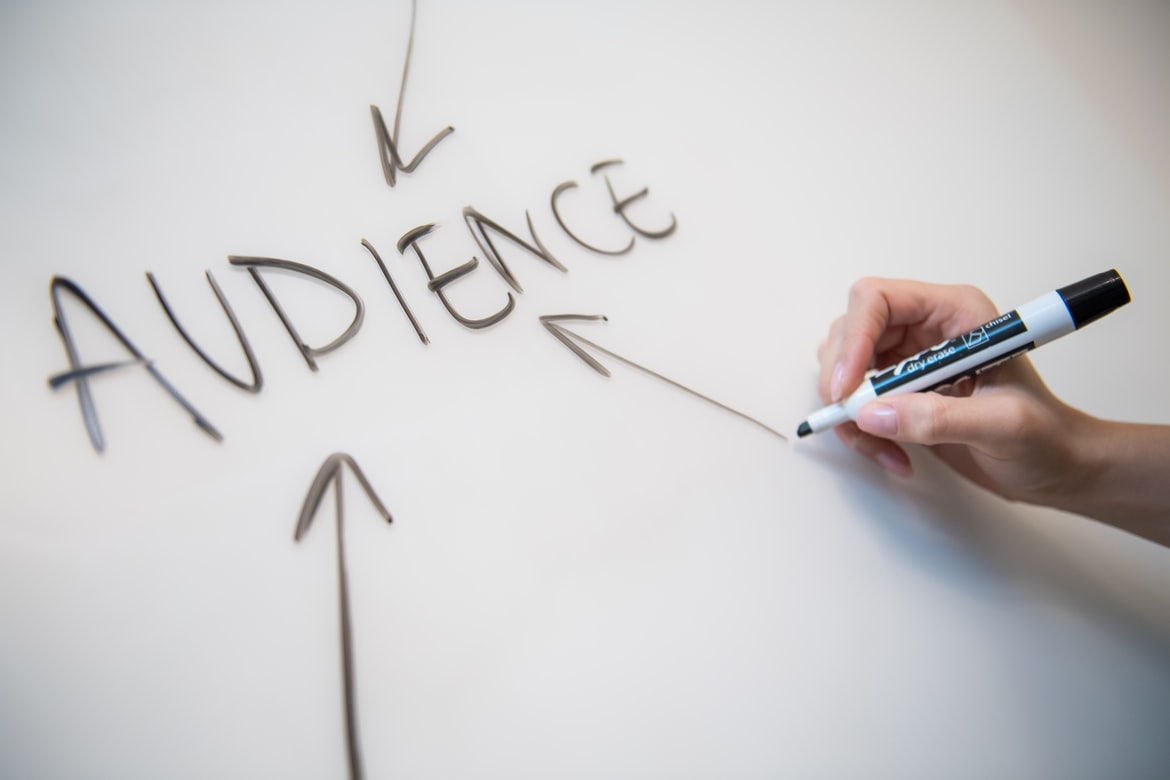

In [1]:
#data wrangling
import pandas as pd 
import numpy as np 
from scipy.stats import chisquare
import pandas_profiling
import scipy.stats as stats
import missingno as msno

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import chart_studio.plotly as py 
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go 

init_notebook_mode(connected=True)
cf.go_offline()


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

#clustering

from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

#importing data
df = pd.read_csv('marketing_campaign.csv', sep=';')
plt.style.use('mystyle')

# Preliminary exploration and data cleaning

In [2]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df['ID'].nunique()

2240

Number of unique ID values correspond to the total number of values; there are no duplicates. 

In [5]:
#checking null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are missing values in the Income Columns. We can Impute these values with the income median.

In [6]:
df["Income"].fillna(df["Income"].median(), inplace=True)

In [7]:
#general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Check unique values for object columns

In [8]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [9]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In Marital_Status there two strange values, let's investigate.

In [10]:
df[df['Marital_Status']=='Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,2,0,0,0,0,0,0,3,11,0


In [11]:
df[df['Marital_Status']=='YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1


For the value YOLO we have a duplicated entry. Hovewer we cannot impute these values and I think that they are just input error, so we can drop the rows with these values.

In [12]:
df = df.drop(df[df['Marital_Status'] == 'YOLO'].index)
df = df.drop(df[df['Marital_Status'] == 'Absurd'].index)
df.shape

(2236, 29)

We don't have a description for Z_CostContact and Z_Revenue, let's see if we can understand what these two columns mean.

In [13]:
df['Z_CostContact'].describe()

count    2236.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [14]:
df['Z_Revenue'].describe()

count    2236.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64

These two columns are constant so basically they are useless and we can drop them.

In [15]:
df.drop(df[['Z_CostContact', 'Z_Revenue']], axis=1, inplace=True)

In [16]:
df.duplicated().sum()

0

# Feature Engineering

I'll modify some exisiting features and create new columns.
We can calculate the age of customer when the data were collected, subtracting 2014 (year of collection) from the year birth. 

In [17]:
df['Age'] = 2014 - df['Year_Birth']

In [18]:
df['Age'].describe()

count    2236.000000
mean       45.203488
std        11.980604
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

We probably have some input error, because the max age is 121.

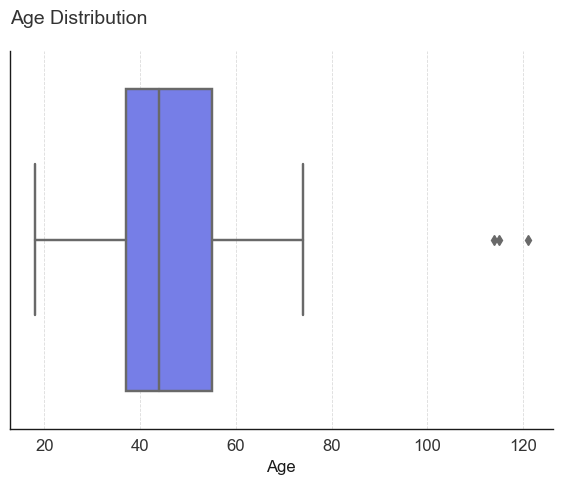

In [19]:
sns.boxplot(df.Age)
plt.title('Age Distribution');

In [20]:
df[df['Age']>100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,1,0,114
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,121
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,115


We will remove these 3 values because they are probably errors.

In [21]:
df = df.drop(df[df['Age'] >100 ].index)

In [22]:
#total money spent
df["Money_Spent"] = (df["MntWines"] + 
                     df["MntFruits"] + 
                     df["MntMeatProducts"] + 
                     df["MntFishProducts"] + 
                     df["MntSweetProducts"] + 
                     df["MntGoldProds"])

#total purchases 
df["PurchaseNum"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

#total children
df["Children"] = df["Kidhome"] + df["Teenhome"]

I will only use two categories for the Marital_Status Column: Together and Single.

In [23]:

df['Marital_Status'].replace({'Married':'Together',
                              'Together':'Together',
                              'Divorced':'Single',
                              'Widow':'Single',
                             'Alone':'Single'}, inplace=True)

Finally, I'll drop redundant columns.

In [24]:
df.drop(["ID", "Dt_Customer", "Year_Birth"], axis=1, inplace=True)

# Visual Exploration

In [25]:
plt.style.use('mystyle')

Now we will quickly visualize some of the most importatn features and explore the correlation between numerical features.

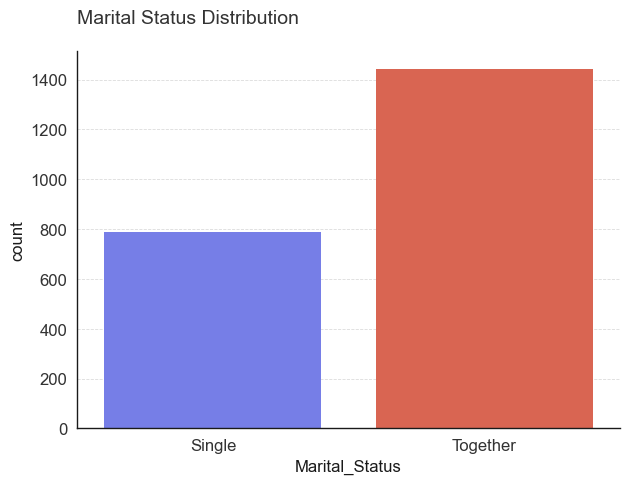

In [26]:
sns.countplot(df.Marital_Status)
plt.title('Marital Status Distribution');

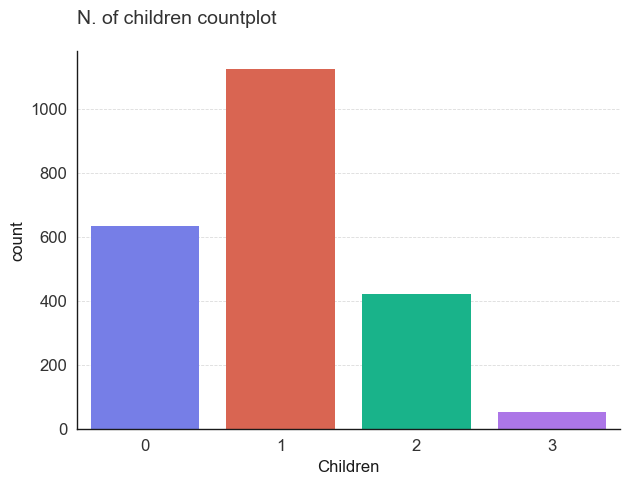

In [27]:
sns.countplot(df.Children)
plt.title('N. of children countplot');

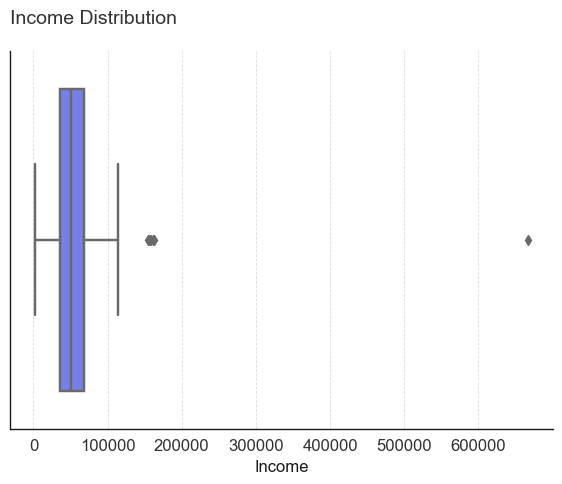

In [28]:
sns.boxplot(df.Income)
plt.title('Income Distribution');

Usually, higher values in the income distribution shouldn't be a problem (it's possible that we have customers that are particularly wealthy). However in this case, I think that the value bigger than 600K is due to an error (maybe a zero too many), so I think we should remove this row. The other two outliers are more beliveable so I'll leave them.

In [29]:
df[df['Income']>200000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Money_Spent,PurchaseNum,Children
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,...,0,0,0,0,0,0,37,62,7,1


In [30]:
df = df.drop(df[df['Income']>200000].index)

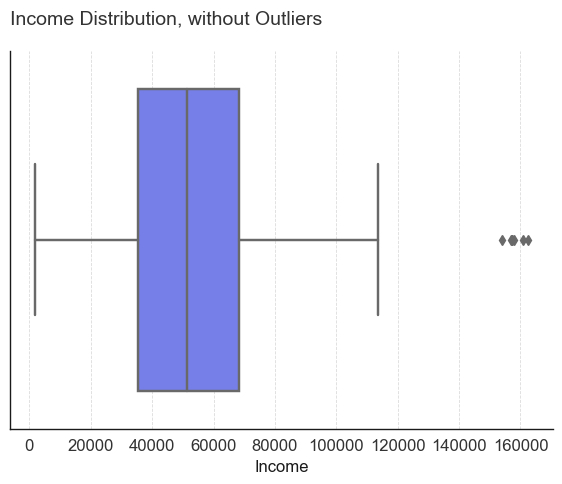

In [31]:
sns.boxplot(df.Income)
plt.title('Income Distribution, without Outliers');

In [32]:
tot_spent = df['Money_Spent'].sum()

tot = {'tot_Fish' : [((df['MntFishProducts'].sum()/tot_spent)*100).round(2)], 
    'tot_Fruits': [((df['MntFruits'].sum()/tot_spent)*100).round(2)],
    'tot_Gold' : [((df['MntGoldProds'].sum()/tot_spent)*100).round(2)],
    'tot_Meat' : [((df['MntMeatProducts'].sum()/tot_spent)*100).round(2)],
    'tot_Sweet' : [((df['MntSweetProducts'].sum()/tot_spent)*100).round(2)],
    'tot_Wines' : [((df['MntWines'].sum()/tot_spent)*100).round(2)]}

df_tot = pd.DataFrame(data=tot)
df_tot = df_tot.squeeze()

In [33]:
labels = ['Fish', 'Fruit','Gold', 'Meat','Sweet', 'Wine']
values = df_tot
fig = px.pie(names=labels, values=values, title="Sales Percentage for each product", )
fig.show()


In [34]:
tot_pur = df['PurchaseNum'].sum()

pur = {'Catalog': [((df['NumCatalogPurchases'].sum()/tot_pur)*100).round(2)],
      'Deals': [((df['NumDealsPurchases'].sum()/tot_pur)*100).round(2)],
      'Store': [((df['NumStorePurchases'].sum()/tot_pur)*100).round(2)],
      'Web' :  [((df['NumWebPurchases'].sum()/tot_pur)*100).round(2)]}

df_pur = pd.DataFrame(data=pur).squeeze()

In [35]:
labels = ['Catalog', 'Deals','Store', 'Web']
values = df_pur
fig = px.pie(names=labels, values=values, title="Percentage of Purchases Distribution")
fig.show()


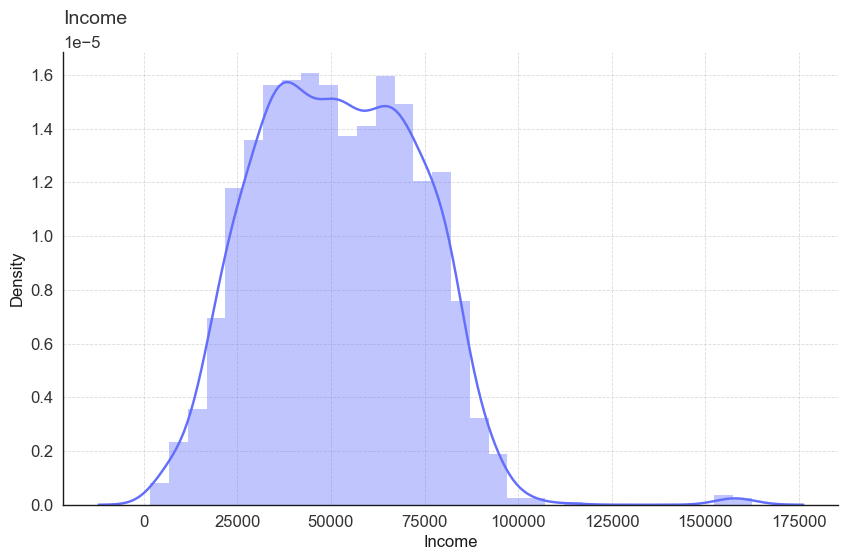

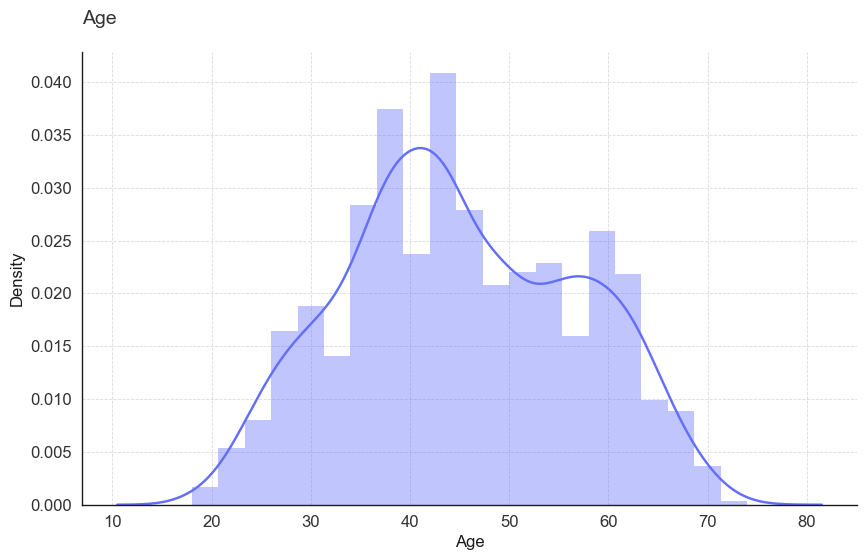

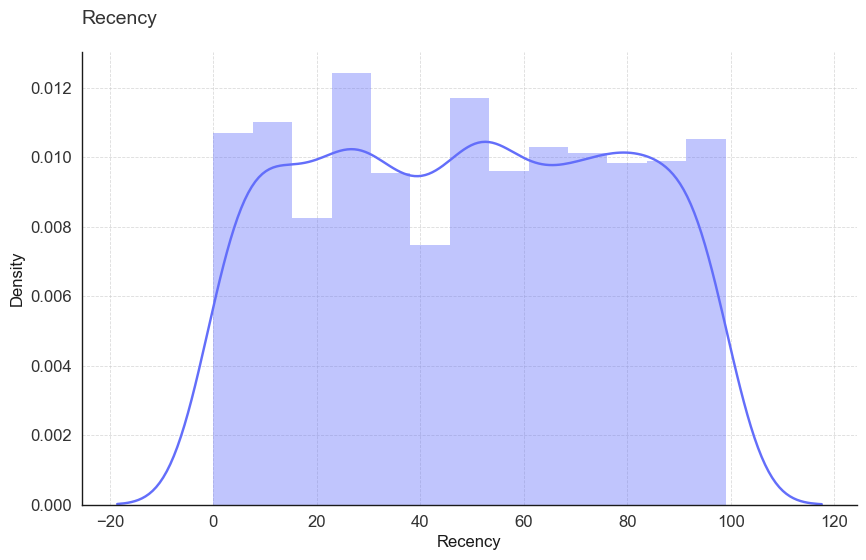

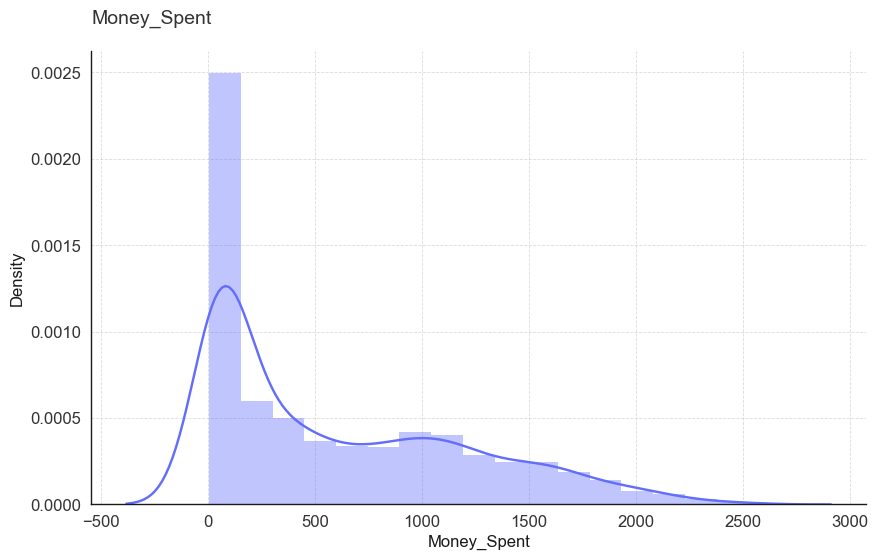

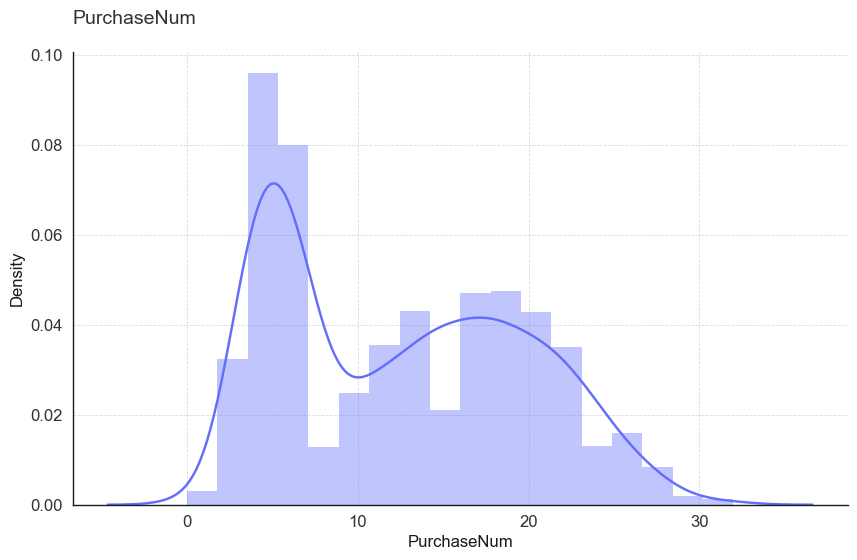

In [36]:
cols_to_plot = df[['Income', 'Age', 'Recency','Money_Spent', 'PurchaseNum']]

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col])
    plt.title(f"{col}");

Finally, we can visualize the linear correlation between numeric variables.

In [37]:
df_corr = df.drop(['Education','Marital_Status','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'], axis=1)

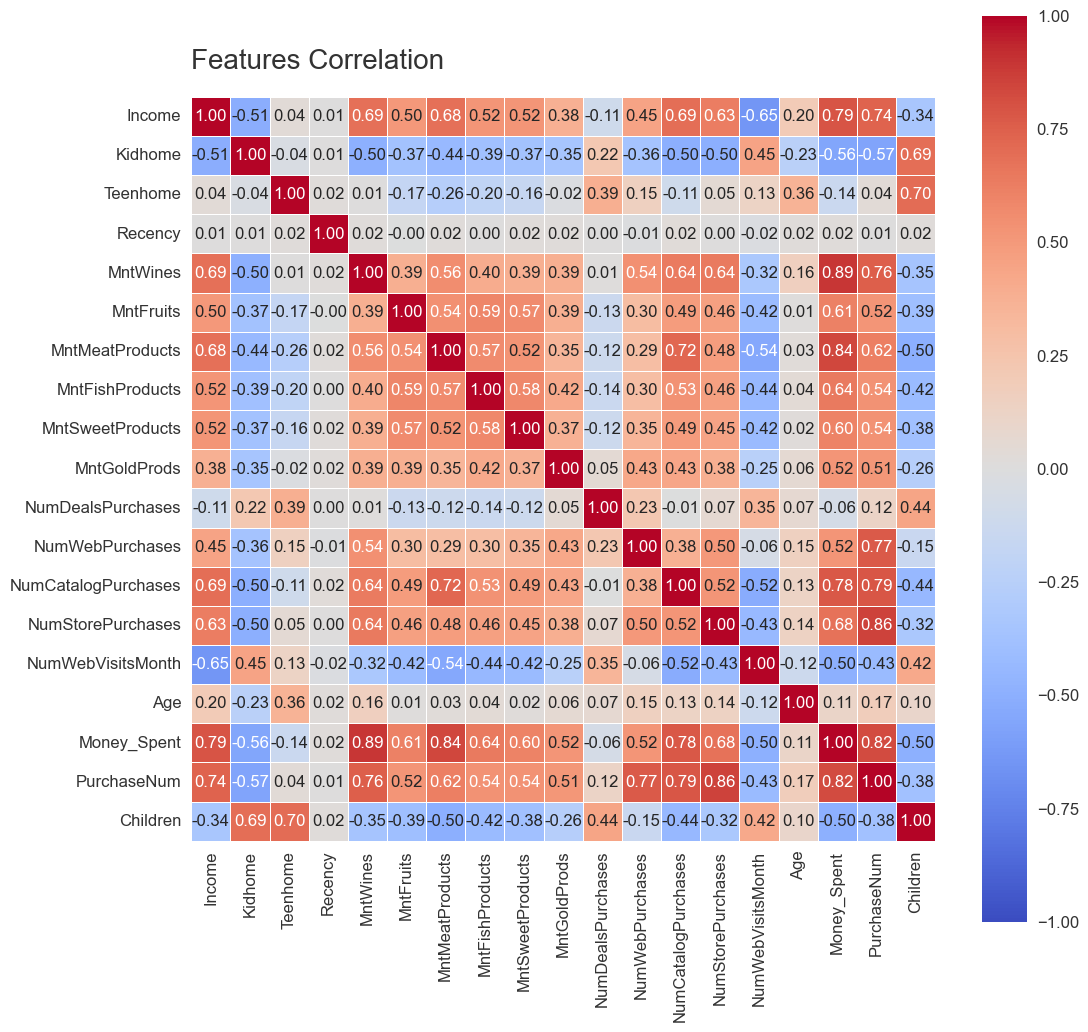

In [38]:
corr = df_corr.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, cmap='coolwarm')
plt.title('Features Correlation', size=20);

Correlations are pretty obvious. Income is positively correlated with the Number of Purchases and the Amount Spent in all the categories. Children is negatively correlated with the amount spent and the income. Recency has basically no correlation with other variables.

# Data Preprocessing

We need to encode categorical variables and standardize the numerical features because we have seen that we have very different distribution.

## One hot Encoding

In [39]:
#create a df copy
X = df

cat_cols = X.select_dtypes(['object']).columns
X = pd.get_dummies(X, columns=cat_cols)

## Standardization

In [40]:
num_cols = ["Income", "Recency", 
            "MntWines", "MntFruits", 
            "MntMeatProducts", "MntFishProducts", 
            "MntSweetProducts", "MntGoldProds", 
            "NumDealsPurchases", "NumWebPurchases", 
            "NumCatalogPurchases", "NumStorePurchases", 
            "NumWebVisitsMonth", "Money_Spent", 
            "PurchaseNum", "Age"]

In [41]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [42]:
X[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2232.0,4.193803e-17,1.000224,-2.344404,-0.770584,-0.025961,0.762904,5.157832
Recency,2232.0,-1.740941e-19,1.000224,-1.698297,-0.869086,0.011950,0.858436,1.722197
MntWines,2232.0,-6.356922e-17,1.000224,-0.902817,-0.831557,-0.389153,0.596606,3.530130
MntFruits,2232.0,-7.640244e-17,1.000224,-0.661026,-0.635838,-0.459529,0.170148,4.351204
MntMeatProducts,2232.0,-1.561873e-17,1.000224,-0.739726,-0.668836,-0.442875,0.288177,6.903084
MntFishProducts,2232.0,-2.501981e-17,1.000224,-0.687235,-0.632133,-0.466825,0.231141,4.069954
MntSweetProducts,2232.0,-2.989445e-17,1.000224,-0.655980,-0.631773,-0.462326,0.142844,5.710403
MntGoldProds,2232.0,-1.315654e-17,1.000224,-0.845362,-0.671821,-0.382587,0.234445,6.134819
NumDealsPurchases,2232.0,5.575986e-17,1.000224,-1.202601,-0.685114,-0.167627,0.349860,6.559704
NumWebPurchases,2232.0,1.118679e-16,1.000224,-1.469423,-0.750100,-0.030777,0.688546,8.241437


# Principal Component Analysis

Principal Component Analysis is an unsupervised statistical technique used for Dimensionality Reduction. It combines the correlated features, creates the same number of features which are uncorrelated to one another and compresses most of the information (variance) into the first components. Hence, it helps us to handle the Multicollinearity which affects the ML models in a bad way.

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set’s variance:

In [43]:
pca = PCA()
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

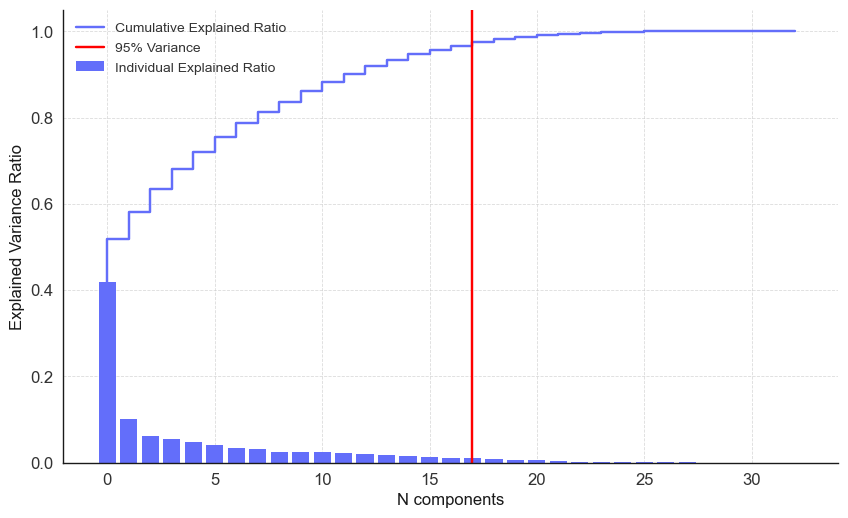

In [44]:
plt.figure(figsize=(10,6))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cumsum)), cumsum, label="Cumulative Explained Ratio")
plt.axvline(d, label='95% Variance', color='red')
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best");

We select the first 3 features (approx 60% of variance) so we can visualize the clusters in a 3d Plot.

In [45]:
pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3"])

# Clustering

To select a good numbr of cluster we can visualize the 'inertia vs K' plot using yellowbrick's KElbowVisualizer

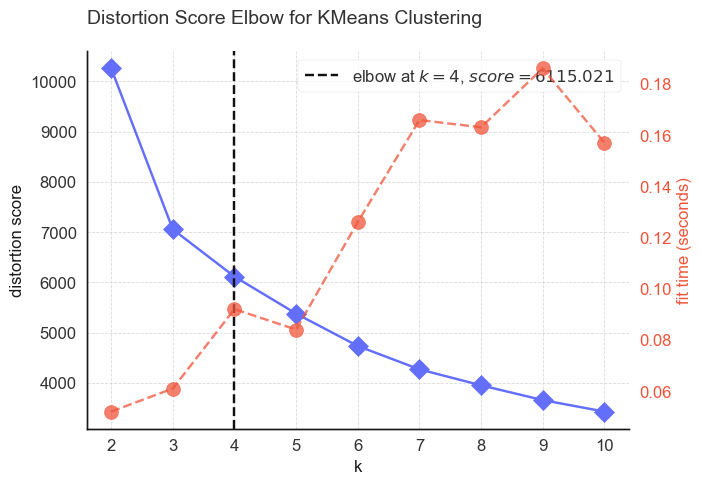

In [46]:
model = KMeans()
elbow_graph = KElbowVisualizer(model, k=(2,11))
elbow_graph.fit(X_reduced)
elbow_graph.show();

So, the best number of clusters should be 4.

In [47]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_reduced)

In [48]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(X_reduced,x="col1", y="col2", z="col3", 
                    color=predictions, title=f"Total Explained Variance: {total_var:.2f}%")
fig.show()

Here we can see the 4 different clusters using 3 features after PCS. Hovewer we only explain 58% of the variance, we can improve this result using more columns. For example with the first 7 columns we should explain roughly 80% of the variance.

In [49]:
pca = PCA(n_components = 7)
pca.fit(X)

X_reduced = pd.DataFrame(pca.transform(X), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

In [50]:
total_var = pca.explained_variance_ratio_.sum() * 100
print("Explained Total Variance:",total_var)

Explained Total Variance: 75.58204201617798


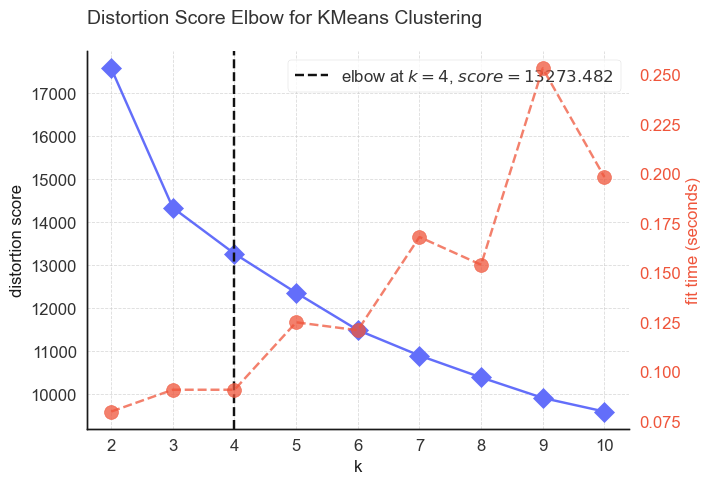

In [51]:
model = KMeans()
elbow_graph = KElbowVisualizer(model, k=(2,11))
elbow_graph.fit(X_reduced)
elbow_graph.show();

Even with 7-dimensional data, the best number of clusters is still 4.

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(X_reduced)

#save results in the original df
df["Clusters"] = predictions

# Personality Analysis

In [53]:
df['Clusters'].value_counts()

1    989
0    473
2    471
3    299
Name: Clusters, dtype: int64

In [54]:
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

cluster0_num = df[df["Clusters"]==0].shape[0]
cluster1_num = df[df["Clusters"]==1].shape[0]
cluster2_num = df[df["Clusters"]==2].shape[0]
cluster3_num = df[df["Clusters"]==3].shape[0]
values = [cluster0_num, cluster1_num, cluster2_num, cluster3_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="Clusters Distribution")])
fig.show()


Almost half of our customers are from cluster 1.

In [55]:
x = df[['Income','Age', 'Money_Spent','PurchaseNum']]
y = df['Clusters']
data = x
data_n_2 = (data - data.mean()) / (data.std()) #standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Clusters",
                    var_name="features",
                    value_name='value')

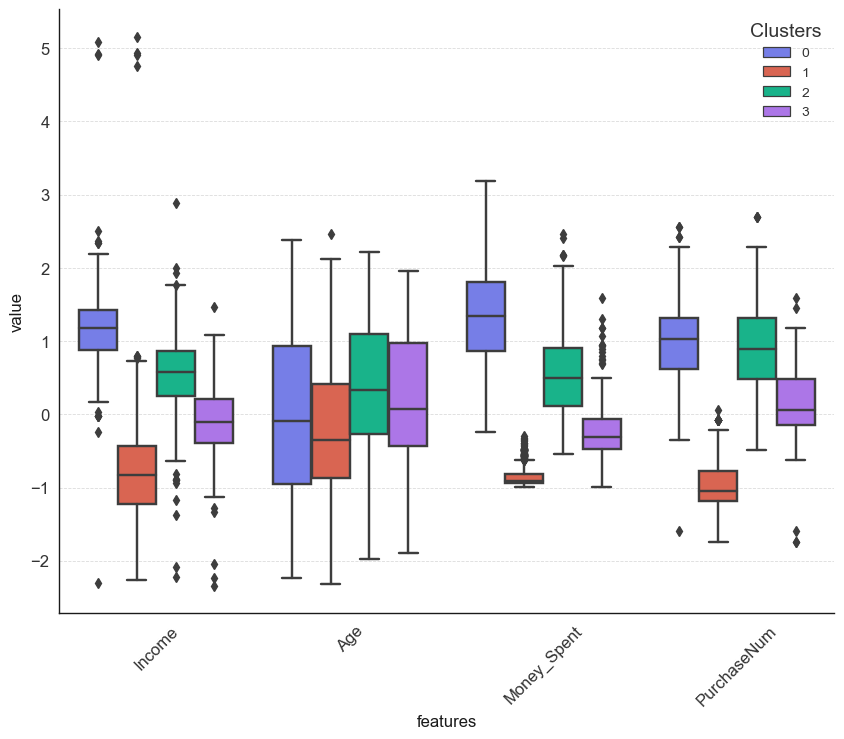

In [56]:
plt.figure(figsize=(10,8))
sns.boxplot(x="features", y="value", hue="Clusters", data=data)
plt.xticks(rotation=45);

From the swarm plot we can see that the clusters are nevr clearly separated for each of our principal variable. Hovewer, Money_ spent and PurchaseNum show more clear boundaries.

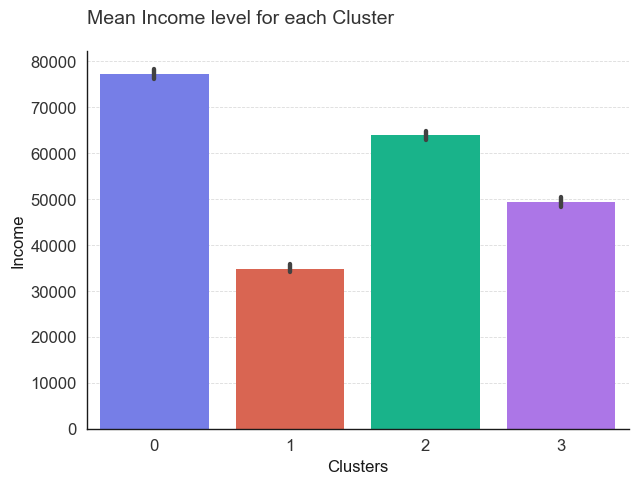

In [57]:
sns.barplot(y='Income', x='Clusters',data=df)
plt.title('Mean Income level for each Cluster');

We can see that the mean income for customers in cluster 0 is slightly higher than cluster 2. Cluster 1 has the smaller mean income level. Hovewer from the swarm plot we can see that both cluster 0 and cluster 2 includes outliers, so let's visualize the median Income level for each cluster.

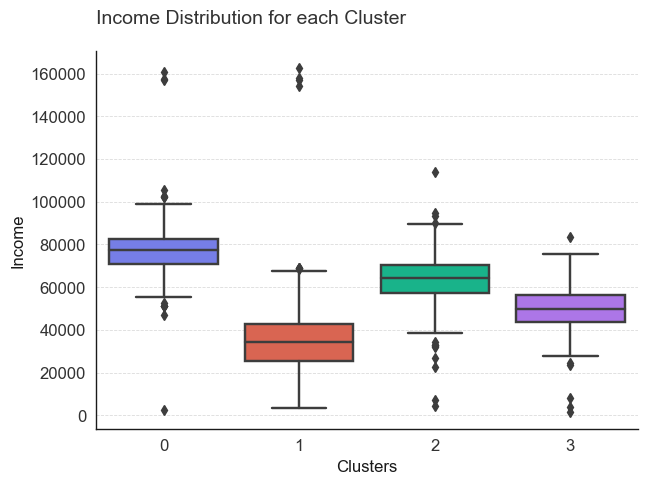

In [58]:
sns.boxplot(y='Income', x='Clusters', data=df)
plt.title('Income Distribution for each Cluster');

So, despite the outliers, the income of the median customer from cluster 1 is still the smallest; while the income of the median customer from cluster 0 is still the highest.

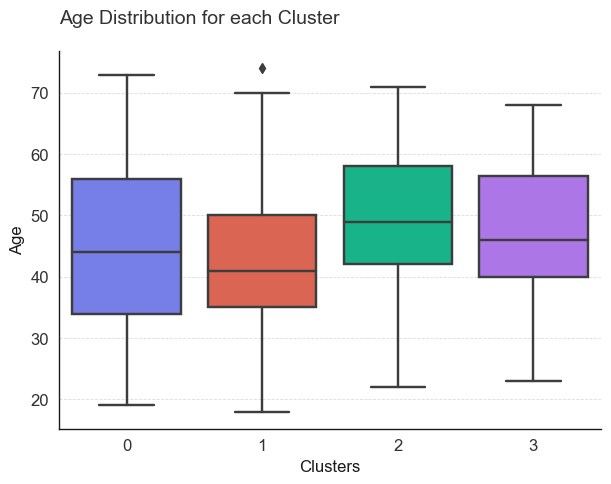

In [59]:
sns.boxplot(y='Age', x='Clusters', data=df)
plt.title('Age Distribution for each Cluster');

The Age distribution doesn't vary much between clusters. Cluster 2 has the highest median age and cluster 1 has the smallest but it's pretty similar with cluster's 0 median age.

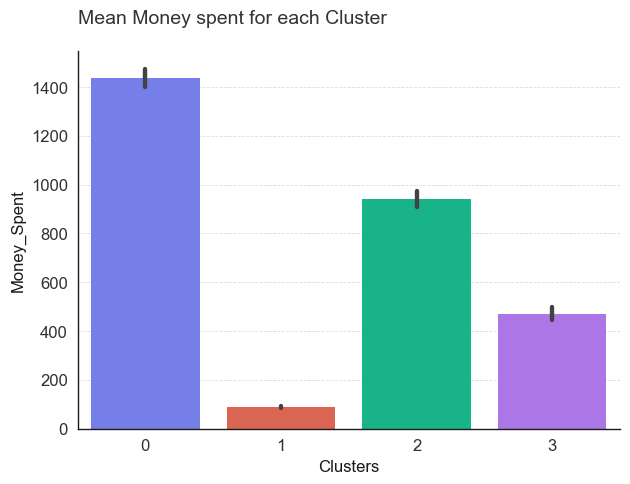

In [60]:
sns.barplot(y='Money_Spent', x='Clusters',data=df)
plt.title('Mean Money spent for each Cluster');

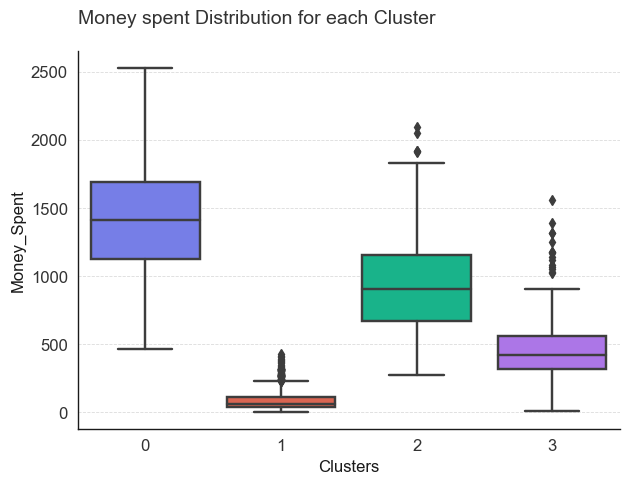

In [61]:
sns.boxplot(y='Money_Spent', x='Clusters',data=df)
plt.title('Money spent Distribution for each Cluster');

Cluster 1 has the lowest income and spends least money on avarage.

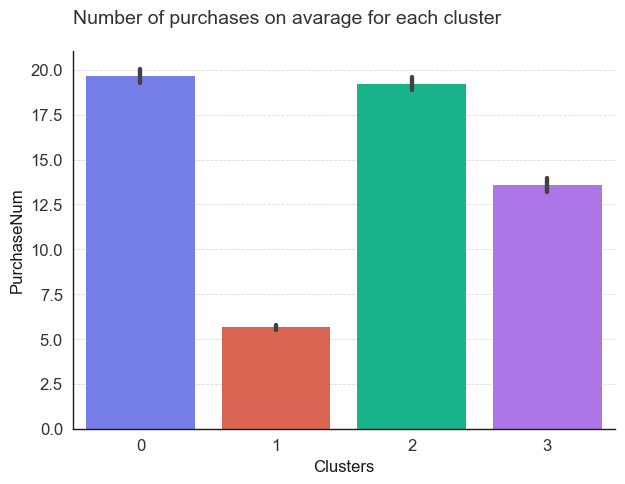

In [62]:
sns.barplot(y='PurchaseNum', x='Clusters',data=df)
plt.title('Number of purchases on avarage for each cluster');

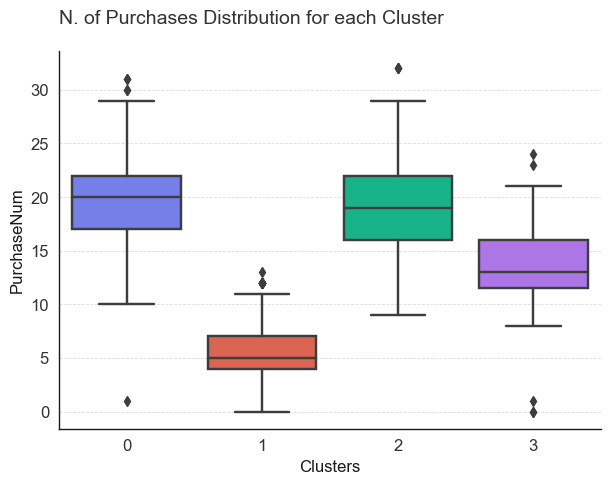

In [63]:
sns.boxplot(y='PurchaseNum', x='Clusters', data=df)
plt.title('N. of Purchases Distribution for each Cluster');

Clearly this distribution is very similar to Money Spent distribution because the two variables are correlated.

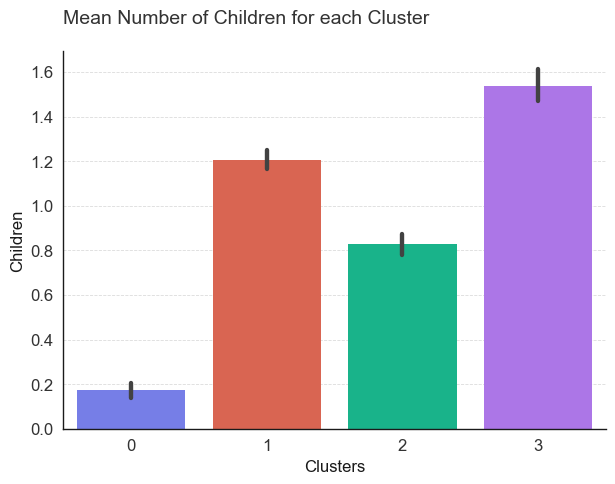

In [64]:
sns.barplot(y='Children', x='Clusters',data=df)
plt.title('Mean Number of Children for each Cluster');

Cluster 0 has almost no child.

In [65]:
x = df[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
y = df['Clusters']
data = x
data_n_2 = (data - data.mean()) / (data.std()) #standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Clusters",
                    var_name="features",
                    value_name='value')

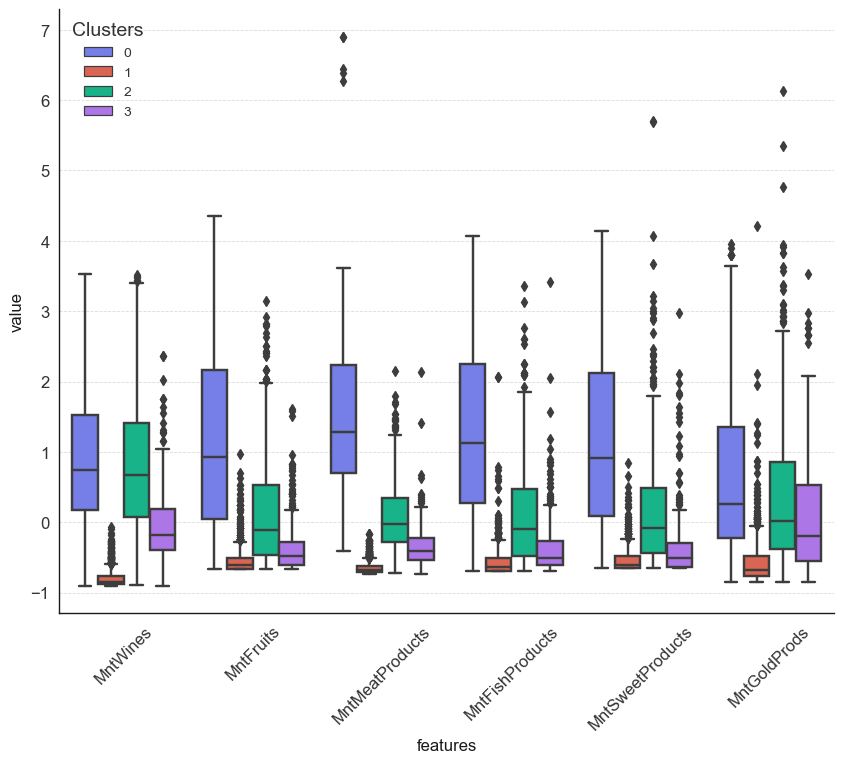

In [66]:
plt.figure(figsize=(10,8))
sns.boxplot(x="features", y="value", hue="Clusters", data=data)
plt.xticks(rotation=45);

We can see more separability considering the amount spent for each category of product, let's investigate further. We can recall that the most important products in terms of sales are Wine, Meat and Gold.

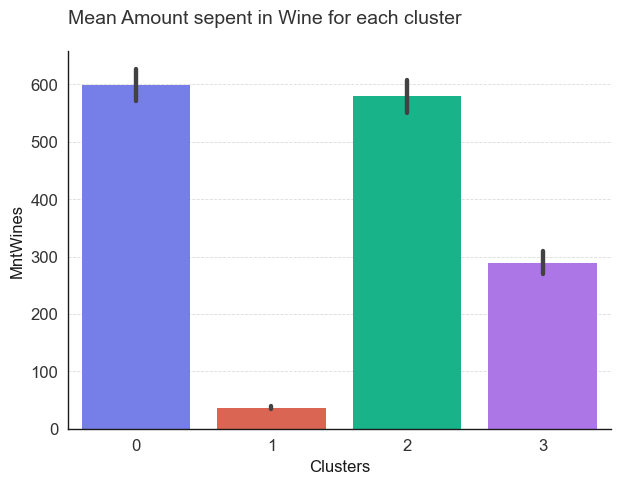

In [67]:
sns.barplot(x='Clusters', y='MntWines', data=df)
plt.title('Mean Amount sepent in Wine for each cluster');

We already know that Cluster 1 spens the least money in general, hovewer we can seet here that Cluster 0 and Cluster 2 are similar for the amount spent in Wine on average.

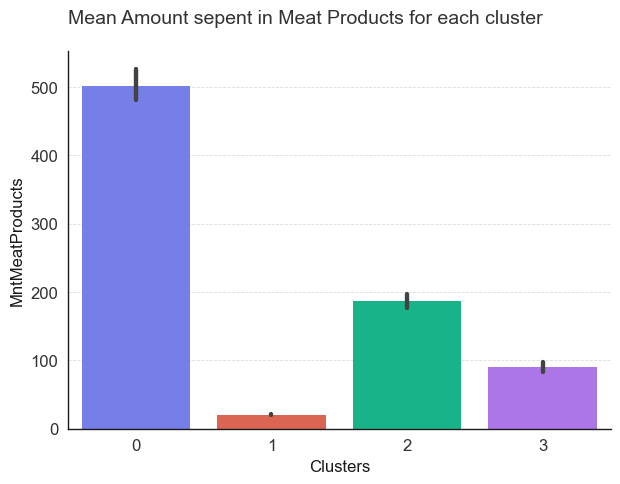

In [68]:
sns.barplot(x='Clusters', y='MntMeatProducts', data=df)
plt.title('Mean Amount sepent in Meat Products for each cluster');

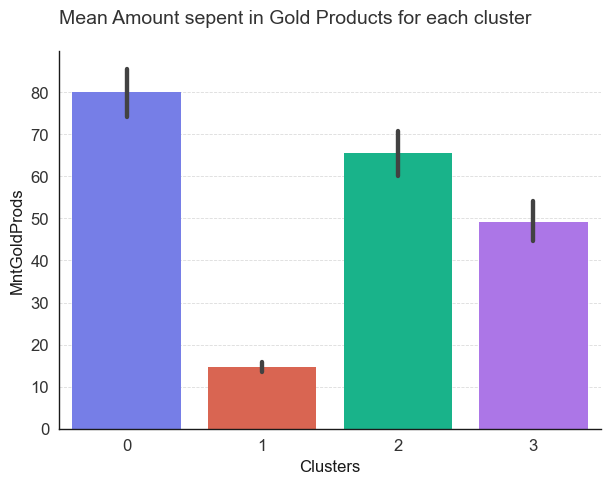

In [69]:
sns.barplot(x='Clusters', y='MntGoldProds', data=df)
plt.title('Mean Amount sepent in Gold Products for each cluster');

There is nothing instresting, most of these distribution are similar to the total amount of Money Spent. Infact all the 'MntVariables' are correlated with Money_Spent.

In [70]:
x = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases']]
y = df['Clusters']
data = x
data_n_2 = (data - data.mean()) / (data.std()) #standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Clusters",
                    var_name="features",
                    value_name='value')

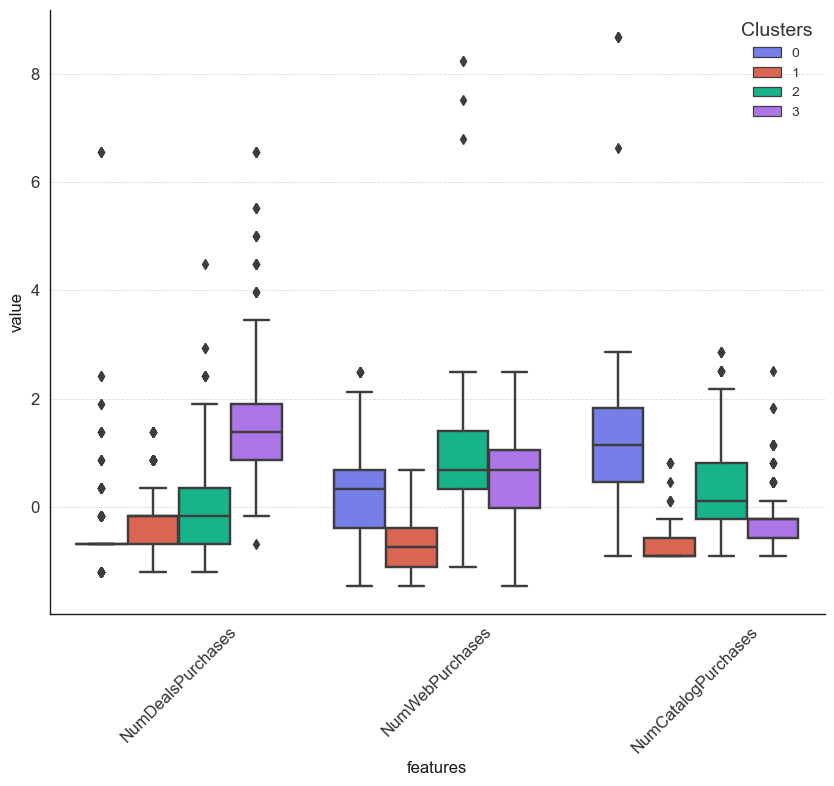

In [71]:
plt.figure(figsize=(10,8))
sns.boxplot(x="features", y="value", hue="Clusters", data=data)
plt.xticks(rotation=45);

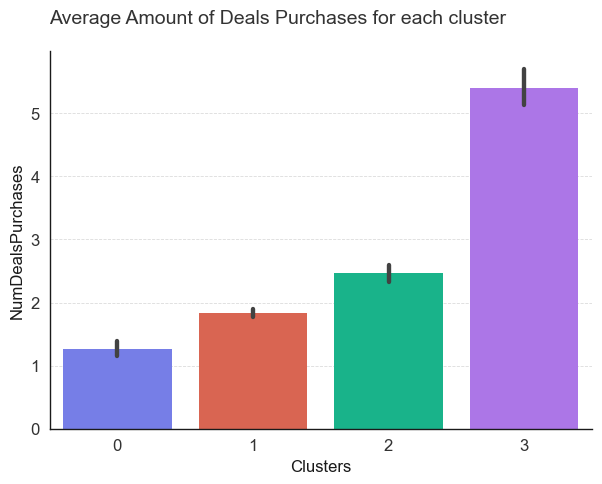

In [72]:
sns.barplot(x='Clusters',y='NumDealsPurchases', data=df)
plt.title('Average Amount of Deals Purchases for each cluster');

Cluster 3 has the highest number of purchase with discount

# Conclusions

**Cluster 0**
* Higher Income on average
* Least Number of Children on Average
* Highest Amount of Money Spent and Number of Purchases on average (shop-lover)
* Benefit least from discount

**Cluster 1**
* Youngest Cluster
* least-earner cluster
* Has a tendecy to spend less money
* Has least purchase number and total amount spent (shop-hater)

**Cluster 2**
* Oldest Cluster
* Second highest number of purchases and Money Spent
* Second highest Income level

**Cluster 3**
* Is the cluster that shops most when there is a discount
* Highest Number of Children on average

# Marketing Suggestions

* We should try to earn more from **cluster 1**. For example could gather information about the location of customers from cluster1 so we could increase discounts at stores nearby to incentivate purchases. If we coul gather the email addresses of customers we could also provide exclusive discounts for Cluster 1. Lastly we could increase the offer from our stores, Cluster 1 is the youngest so we could offer products more suitable for the youngerst.

* Customers in **Cluster 3** shops a lot when there is a discount and have the highest number of children. Given these information we could offer discount based on the number of children to these customers or creat a marketing campaign focused on children. Also in this case we could expand the offer to include more child-friendly products.